In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical
from scipy.io import loadmat
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dict_ = np.load('/content/gdrive/MyDrive/ML/Final/data_dict.npy', allow_pickle = 'True').item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

In [ ]:
len(X_train)

24000

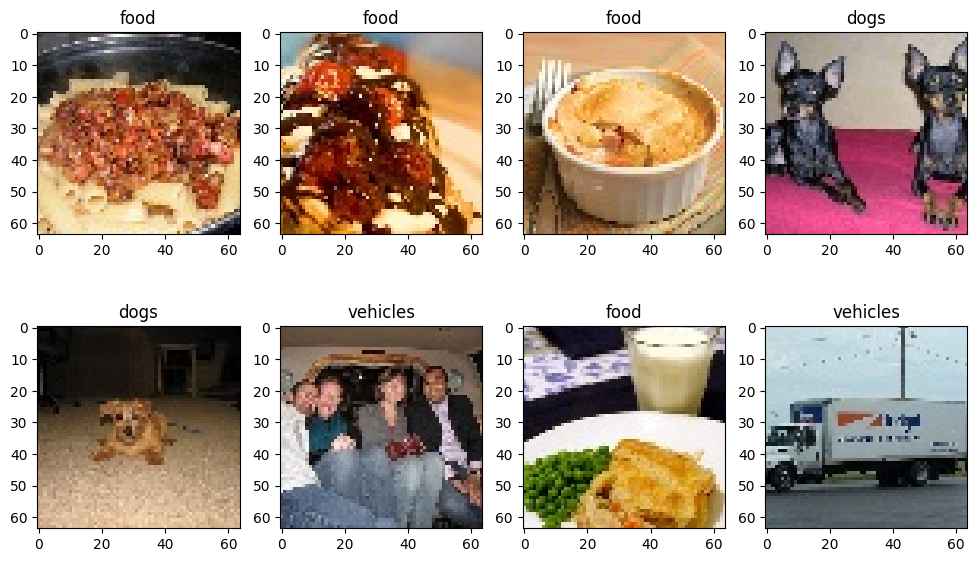

In [ ]:
plt.figure(figsize = (12,7))
cate = ['dogs', 'food','vehicles']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[y_train[ind]])


In [ ]:
def preprocess_data(X, y):
  X = np.array(X)
  X = X.astype(np.float32)
  X = X/255.0
  y = to_categorical(np.array(y))
  return X, y

In [ ]:
X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)


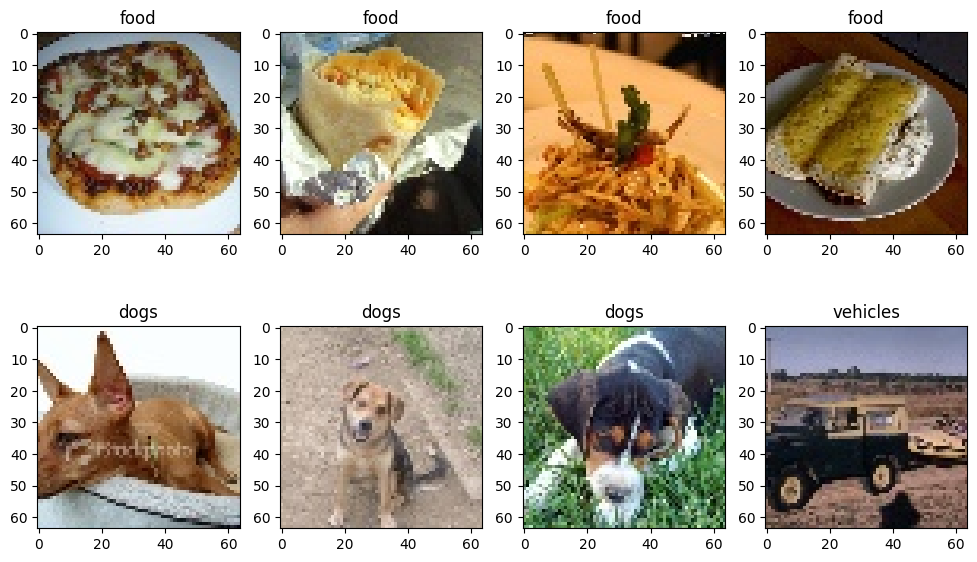

In [ ]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[np.argmax(y_train[ind])])

In [ ]:
y_train.shape

(24000, 3)

**PART - 3**

Epoch 1/200 - train acc: 0.3340 - test acc: 0.3278
Epoch 2/200 - train acc: 0.3385 - test acc: 0.3633
Epoch 3/200 - train acc: 0.3505 - test acc: 0.4058
Epoch 4/200 - train acc: 0.3689 - test acc: 0.4410
Epoch 5/200 - train acc: 0.3831 - test acc: 0.4712
Epoch 6/200 - train acc: 0.3873 - test acc: 0.4900
Epoch 7/200 - train acc: 0.4151 - test acc: 0.5142
Epoch 8/200 - train acc: 0.4327 - test acc: 0.5282
Epoch 9/200 - train acc: 0.4512 - test acc: 0.5388
Epoch 10/200 - train acc: 0.4663 - test acc: 0.5523
Epoch 11/200 - train acc: 0.4904 - test acc: 0.5595
Epoch 12/200 - train acc: 0.4983 - test acc: 0.5672
Epoch 13/200 - train acc: 0.5201 - test acc: 0.5698
Epoch 14/200 - train acc: 0.5335 - test acc: 0.5827
Epoch 15/200 - train acc: 0.5472 - test acc: 0.5867
Epoch 16/200 - train acc: 0.5635 - test acc: 0.5948
Epoch 17/200 - train acc: 0.5755 - test acc: 0.5990
Epoch 18/200 - train acc: 0.5792 - test acc: 0.6013
Epoch 19/200 - train acc: 0.5853 - test acc: 0.6030
Epoch 20/200 - train 

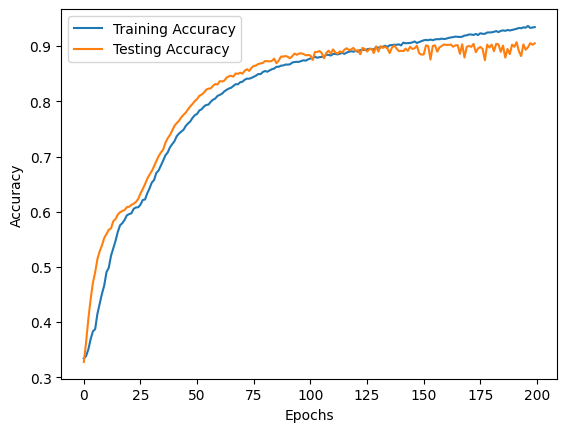

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (5,5), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(384, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(384, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=3, activation='softmax')
])

num_epochs = 200
batch_size = 64
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
trainingAcc = []
testingAcc = []

def accuracy_result(test_y_pred,y_test):
  return tf.reduce_sum(tf.cast(tf.argmax(test_y_pred, axis=1) == tf.argmax(y_test, axis=1), tf.float32))

for epoch in range(num_epochs):
    indices = tf.random.shuffle(tf.range(len(X_train)))
    X_train = tf.gather(X_train, indices)
    y_train = tf.gather(y_train, indices)
    tempTrainAcc = 0
    for batch in range((len(X_train) // batch_size)):
      X_train_part = X_train[batch*batch_size:(batch+1)*batch_size]
      y_train_part = y_train[batch*batch_size:(batch+1)*batch_size]
      with tf.GradientTape() as tape:
          ypred = model(X_train_part, training=True)
          temp_loss = loss_fn(y_train_part, ypred)
      grads = tape.gradient(temp_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      preds = tf.argmax(ypred, axis=1)
      targets = tf.argmax(y_train_part, axis=1)
      tempTrainAcc += accuracy_result(ypred,y_train_part)
    tempTrainAcc /= len(X_train)
    trainingAcc.append(tempTrainAcc)
    test_y_pred = model(X_test, training=False)
    test_acc = accuracy_result(test_y_pred,y_test)/len(X_test)
    testingAcc.append(test_acc)
    print('Epoch {}/{} - train acc: {:.4f} - test acc: {:.4f}'.format(epoch+1, num_epochs, tempTrainAcc, test_acc))

plt.plot(trainingAcc, label='Training Accuracy')
plt.plot(testingAcc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save_weights('/content/gdrive/MyDrive/ML/Final/intial_part_3.h5')

**Early Stoppoing**

To prevent the model from overfitting the data and not generalize the data.

Epoch 1/30 - train acc: 0.4409 - test acc: 0.5890 - test loss: 1.0817
Epoch 2/30 - train acc: 0.5815 - test acc: 0.6237 - test loss: 0.8571
Epoch 3/30 - train acc: 0.6374 - test acc: 0.7070 - test loss: 0.7108
Epoch 4/30 - train acc: 0.7115 - test acc: 0.7763 - test loss: 0.6190
Epoch 5/30 - train acc: 0.7738 - test acc: 0.8262 - test loss: 0.5245
Epoch 6/30 - train acc: 0.8150 - test acc: 0.8508 - test loss: 0.4418
Epoch 7/30 - train acc: 0.8340 - test acc: 0.8385 - test loss: 0.4594
Epoch 8/30 - train acc: 0.8495 - test acc: 0.8723 - test loss: 0.3776
Epoch 9/30 - train acc: 0.8608 - test acc: 0.8883 - test loss: 0.3474
Epoch 10/30 - train acc: 0.8665 - test acc: 0.8913 - test loss: 0.3303
Epoch 11/30 - train acc: 0.8717 - test acc: 0.8928 - test loss: 0.3266
Epoch 12/30 - train acc: 0.8771 - test acc: 0.8833 - test loss: 0.3526
Epoch 13/30 - train acc: 0.8808 - test acc: 0.9000 - test loss: 0.3187
Epoch 14/30 - train acc: 0.8874 - test acc: 0.8188 - test loss: 0.5955
Epoch 15/30 - t

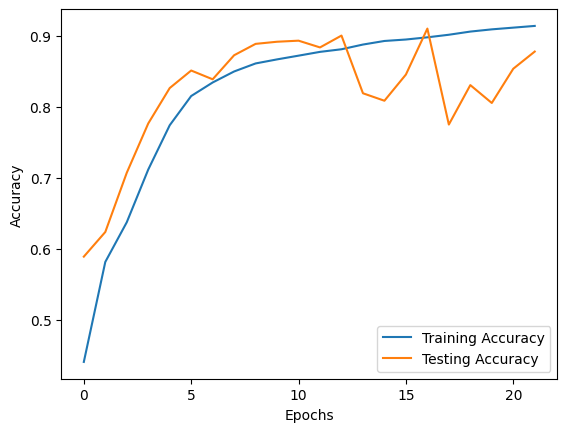

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (5,5), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(384, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(384, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=3, activation='softmax')
])

num_epochs = 30
batch_size = 64

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
trainingAcc = []
testingAcc = []

def accuracy_result(test_y_pred,y_test):
  return tf.reduce_sum(tf.cast(tf.argmax(test_y_pred, axis=1) == tf.argmax(y_test, axis=1), tf.float32))
early_stop_patience = 5
maxLoss = np.inf
maxLossEpoch = 0

for epoch in range(num_epochs):
    indices = tf.random.shuffle(tf.range(len(X_train)))
    X_train = tf.gather(X_train, indices)
    y_train = tf.gather(y_train, indices)
    tempTrainAcc = 0
    for batch in range((len(X_train) // batch_size)):
      X_train_part = X_train[batch*batch_size:(batch+1)*batch_size]
      y_train_part = y_train[batch*batch_size:(batch+1)*batch_size]
      with tf.GradientTape() as tape:
          ypred = model(X_train_part, training=True)
          temp_loss = loss_fn(y_train_part, ypred)
      grads = tape.gradient(temp_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      preds = tf.argmax(ypred, axis=1)
      targets = tf.argmax(y_train_part, axis=1)
      tempTrainAcc += accuracy_result(ypred,y_train_part)
    tempTrainAcc /= len(X_train)
    trainingAcc.append(tempTrainAcc)
    test_y_pred = model(X_test, training=False)
    test_acc = accuracy_result(test_y_pred,y_test)/len(X_test)
    testingAcc.append(test_acc)
    test_loss = loss_fn(y_test,test_y_pred)
    print('Epoch {}/{} - train acc: {:.4f} - test acc: {:.4f} - test loss: {:.4f}'.format(epoch+1, num_epochs, tempTrainAcc, test_acc,test_loss))
    if test_loss < maxLoss:
          maxLoss = test_loss
          maxLossEpoch = epoch

    if epoch - maxLossEpoch >= early_stop_patience:
        print(f'Early stopping after {epoch+1} epochs.')
        break

plt.plot(trainingAcc, label='Training Accuracy')
plt.plot(testingAcc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save_weights('/content/gdrive/MyDrive/ML/Final/before_modification_part_3.h5')

**PART - 4**

In [ ]:
np.random.seed(20)
train_raw = loadmat('/content/gdrive/MyDrive/ML/Final/train_32x32.mat')
test_raw = loadmat('/content/gdrive/MyDrive/ML/Final/test_32x32.mat')
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')
train_labels = train_raw['y']
test_labels = test_raw['y']
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')
train_images /= 255.0
test_images /= 255.0
train_labels = LabelBinarizer().fit_transform(train_labels)
test_labels = LabelBinarizer().fit_transform(test_labels)
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

In [ ]:
predicted_classes = np.argmax(train_labels, axis=1)
class_counts = np.bincount(predicted_classes)
print(class_counts)

[13861 10585  8497  7458  6882  5727  5595  5045  4659  4948]


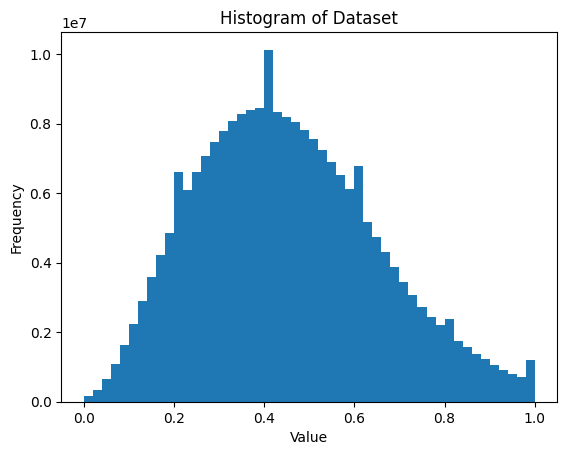

In [ ]:
plt.hist(train_images.flatten(), bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dataset')
plt.show()

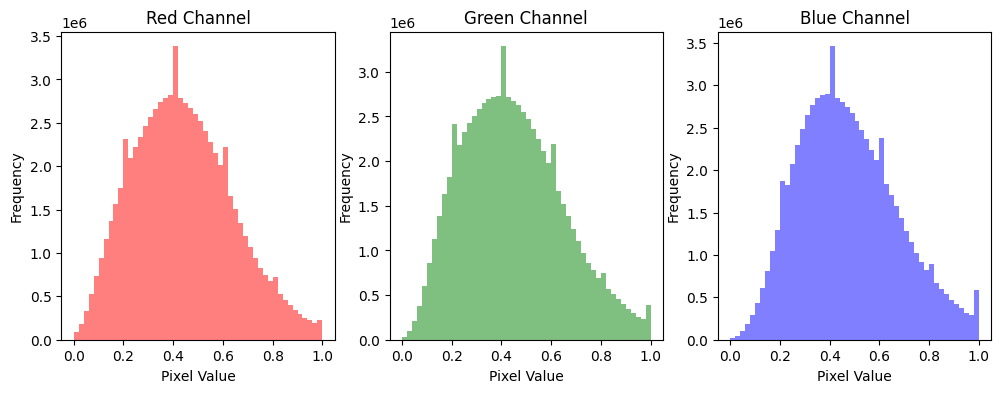

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    if i==0:
      color = 'red'
    elif i ==1:
      color= 'green'
    else:
      color = 'Blue'
    axis[i].hist(train_images[..., i].flatten(), bins=50, color=color, alpha=0.5)
    axis[i].set_xlabel('Pixel Value')
    axis[i].set_ylabel('Frequency')
    axis[i].set_title(f'{color.capitalize()} Channel')
plt.show()


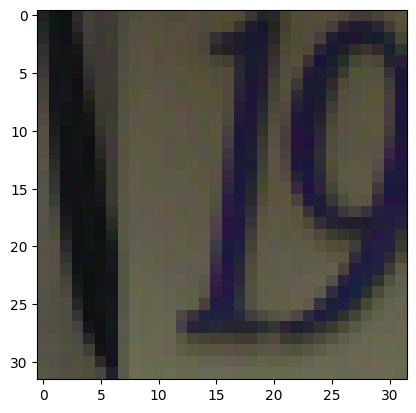

In [ ]:
plt.imshow(train_images[0,:,:,:])
plt.show()

In [ ]:
import numpy as np
from PIL import Image
horizontalflip=True
rescale=1./255
width_shift_range=0.2
height_shift_range=0.2
zoom_range = 0.2
def apply_augmentation(images,labels):
  augmented_images = []
  augmented_labels = []
  for img,label in zip(images,labels):
    augmented_images.append(np.array(img))
    augmented_labels.append(label)
    rotated_img = np.fliplr(img)
    augmented_images.append(rotated_img)
    augmented_labels.append(label)
  return np.array(augmented_images),np.array(augmented_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=22)
# X_train,y_train = apply_augmentation(X_train,y_train)

Epoch 1/10 - train acc: 0.1750 - test acc: 0.1937
Epoch 2/10 - train acc: 0.1859 - test acc: 0.1938
Epoch 3/10 - train acc: 0.1874 - test acc: 0.1938
Epoch 4/10 - train acc: 0.1865 - test acc: 0.1938
Epoch 5/10 - train acc: 0.1870 - test acc: 0.1938
Epoch 6/10 - train acc: 0.1869 - test acc: 0.1938
Epoch 7/10 - train acc: 0.1866 - test acc: 0.1938
Epoch 8/10 - train acc: 0.1867 - test acc: 0.1938
Epoch 9/10 - train acc: 0.1867 - test acc: 0.1938
Epoch 10/10 - train acc: 0.1874 - test acc: 0.1938


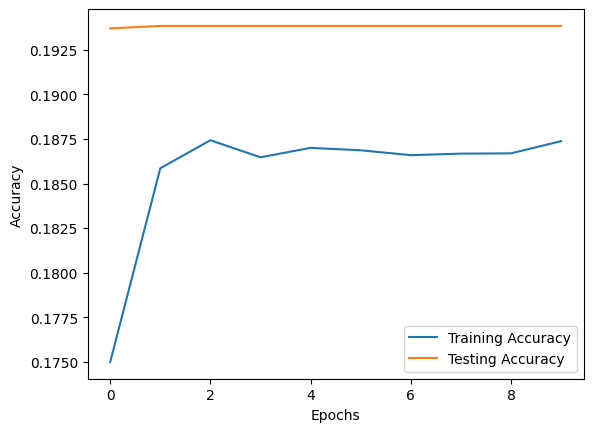

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (5,5), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])
num_epochs = 10
batch_size = 512
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
trainingAcc = []
testingAcc = []

def accuracy_result(test_y_pred,y_test):
  return tf.reduce_sum(tf.cast(tf.argmax(test_y_pred, axis=1) == tf.argmax(y_test, axis=1), tf.float32))

for epoch in range(num_epochs):
    indices = tf.random.shuffle(tf.range(len(X_train)))
    X_train = tf.gather(X_train, indices)
    y_train = tf.gather(y_train, indices)
    tempTrainAcc = 0
    for batch in range((len(X_train) // batch_size)):
      X_train_part = X_train[batch*batch_size:(batch+1)*batch_size]
      y_train_part = y_train[batch*batch_size:(batch+1)*batch_size]
      with tf.GradientTape() as tape:
          ypred = model(X_train_part, training=True)
          temp_loss = loss_fn(y_train_part, ypred)
      grads = tape.gradient(temp_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      preds = tf.argmax(ypred, axis=1)
      targets = tf.argmax(y_train_part, axis=1)
      tempTrainAcc += accuracy_result(ypred,y_train_part)
    tempTrainAcc /= len(X_train)
    trainingAcc.append(tempTrainAcc)
    test_y_pred = model(X_test, training=False)
    test_acc = accuracy_result(test_y_pred,y_test)/len(X_test)
    testingAcc.append(test_acc)
    print('Epoch {}/{} - train acc: {:.4f} - test acc: {:.4f}'.format(epoch+1, num_epochs, tempTrainAcc, test_acc))

plt.plot(trainingAcc, label='Training Accuracy')
plt.plot(testingAcc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


model.save_weights('/content/gdrive/MyDrive/ML/Final/assignment_2_part_4_without_augmentation.h5')


(117210, 32, 32, 3)


Epoch 1/50 - train acc: 0.1997 - test acc: 0.3060
Epoch 2/50 - train acc: 0.3015 - test acc: 0.3801
Epoch 3/50 - train acc: 0.3862 - test acc: 0.5375
Epoch 4/50 - train acc: 0.4776 - test acc: 0.6306
Epoch 5/50 - train acc: 0.5548 - test acc: 0.7012
Epoch 6/50 - train acc: 0.6231 - test acc: 0.7687
Epoch 7/50 - train acc: 0.6745 - test acc: 0.7921
Epoch 8/50 - train acc: 0.7104 - test acc: 0.8026
Epoch 9/50 - train acc: 0.7375 - test acc: 0.8202
Epoch 10/50 - train acc: 0.7597 - test acc: 0.8296
Epoch 11/50 - train acc: 0.7760 - test acc: 0.8314
Epoch 12/50 - train acc: 0.7893 - test acc: 0.8415
Epoch 13/50 - train acc: 0.8021 - test acc: 0.8512
Epoch 14/50 - train acc: 0.8110 - test acc: 0.8570
Epoch 15/50 - train acc: 0.8206 - test acc: 0.8652
Epoch 16/50 - train acc: 0.8288 - test acc: 0.8602
Epoch 17/50 - train acc: 0.8353 - test acc: 0.8703
Epoch 18/50 - train acc: 0.8419 - test acc: 0.8727
Epoch 19/50 - train acc: 0.8470 - test acc: 0.8818
Epoch 20/50 - train acc: 0.8539 - test a

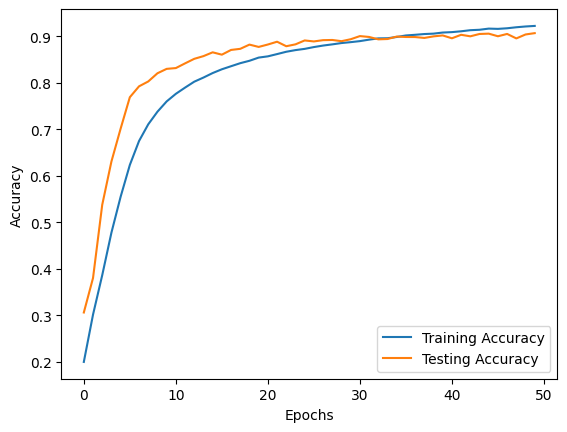

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (5,5), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])
num_epochs = 50
batch_size = 64
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
trainingAcc = []
testingAcc = []

def accuracy_result(test_y_pred,y_test):
  return tf.reduce_sum(tf.cast(tf.argmax(test_y_pred, axis=1) == tf.argmax(y_test, axis=1), tf.float32))

for epoch in range(num_epochs):
    indices = tf.random.shuffle(tf.range(len(X_train)))
    X_train = tf.gather(X_train, indices)
    y_train = tf.gather(y_train, indices)
    tempTrainAcc = 0
    for batch in range((len(X_train) // batch_size)):
      X_train_part = X_train[batch*batch_size:(batch+1)*batch_size]
      y_train_part = y_train[batch*batch_size:(batch+1)*batch_size]
      with tf.GradientTape() as tape:
          ypred = model(X_train_part, training=True)
          temp_loss = loss_fn(y_train_part, ypred)
      grads = tape.gradient(temp_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      preds = tf.argmax(ypred, axis=1)
      targets = tf.argmax(y_train_part, axis=1)
      tempTrainAcc += accuracy_result(ypred,y_train_part)
    tempTrainAcc /= len(X_train)
    trainingAcc.append(tempTrainAcc)
    test_y_pred = model(X_test, training=False)
    test_acc = accuracy_result(test_y_pred,y_test)/len(X_test)
    testingAcc.append(test_acc)
    print('Epoch {}/{} - train acc: {:.4f} - test acc: {:.4f}'.format(epoch+1, num_epochs, tempTrainAcc, test_acc))

plt.plot(trainingAcc, label='Training Accuracy')
plt.plot(testingAcc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


model.save_weights('/content/gdrive/MyDrive/ML/Final/assignment_2_part_4.h5')

Epoch 1/50 - train acc: 0.1727 - test acc: 0.2652 - test loss: 2.0921
Epoch 2/50 - train acc: 0.2885 - test acc: 0.3860 - test loss: 1.8003
Epoch 3/50 - train acc: 0.3755 - test acc: 0.5478 - test loss: 1.4258
Epoch 4/50 - train acc: 0.4748 - test acc: 0.6476 - test loss: 1.1319
Epoch 5/50 - train acc: 0.5652 - test acc: 0.7157 - test loss: 0.9100
Epoch 6/50 - train acc: 0.6304 - test acc: 0.7397 - test loss: 0.8263
Epoch 7/50 - train acc: 0.6802 - test acc: 0.7897 - test loss: 0.6940
Epoch 8/50 - train acc: 0.7168 - test acc: 0.7950 - test loss: 0.6646
Epoch 9/50 - train acc: 0.7455 - test acc: 0.8271 - test loss: 0.5572
Epoch 10/50 - train acc: 0.7661 - test acc: 0.8318 - test loss: 0.5303
Epoch 11/50 - train acc: 0.7834 - test acc: 0.8311 - test loss: 0.5396
Epoch 12/50 - train acc: 0.7969 - test acc: 0.8539 - test loss: 0.4743
Epoch 13/50 - train acc: 0.8088 - test acc: 0.8561 - test loss: 0.4686
Epoch 14/50 - train acc: 0.8205 - test acc: 0.8633 - test loss: 0.4429
Epoch 15/50 - t

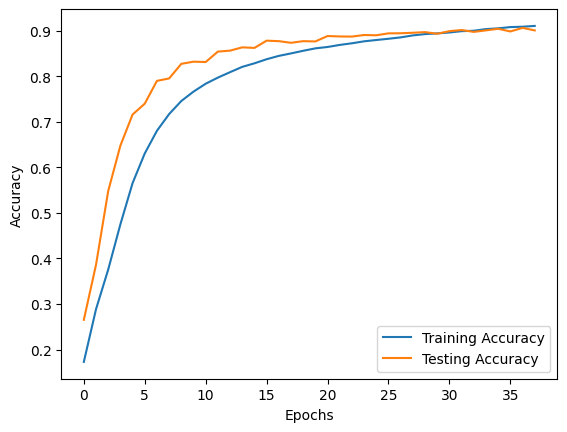

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (5,5), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1),  padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])
num_epochs = 50
batch_size = 64

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
trainingAcc = []
testingAcc = []

def accuracy_result(test_y_pred,y_test):
  return tf.reduce_sum(tf.cast(tf.argmax(test_y_pred, axis=1) == tf.argmax(y_test, axis=1), tf.float32))
early_stop_patience = 3
maxLoss = np.inf
maxLossEpoch = 0

for epoch in range(num_epochs):
    indices = tf.random.shuffle(tf.range(len(X_train)))
    X_train = tf.gather(X_train, indices)
    y_train = tf.gather(y_train, indices)
    tempTrainAcc = 0
    for batch in range((len(X_train) // batch_size)):
      X_train_part = X_train[batch*batch_size:(batch+1)*batch_size]
      y_train_part = y_train[batch*batch_size:(batch+1)*batch_size]
      with tf.GradientTape() as tape:
          ypred = model(X_train_part, training=True)
          temp_loss = loss_fn(y_train_part, ypred)
      grads = tape.gradient(temp_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))
      preds = tf.argmax(ypred, axis=1)
      targets = tf.argmax(y_train_part, axis=1)
      tempTrainAcc += accuracy_result(ypred,y_train_part)
    tempTrainAcc /= len(X_train)
    trainingAcc.append(tempTrainAcc)
    test_y_pred = model(X_test, training=False)
    test_acc = accuracy_result(test_y_pred,y_test)/len(X_test)
    testingAcc.append(test_acc)
    test_loss = loss_fn(y_test,test_y_pred)
    print('Epoch {}/{} - train acc: {:.4f} - test acc: {:.4f} - test loss: {:.4f}'.format(epoch+1, num_epochs, tempTrainAcc, test_acc,test_loss))
    if test_loss < maxLoss:
          maxLoss = test_loss
          maxLossEpoch = epoch
    if epoch - maxLossEpoch >= early_stop_patience:
        print(f'Early stopping after {epoch+1} epochs.')
        break
plt.plot(trainingAcc, label='Training Accuracy')
plt.plot(testingAcc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save_weights('/content/gdrive/MyDrive/ML/Final/assignment_2_part_4_early_stopping.h5')